### Importing necessary libraries & Data

In [1]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split


# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [2]:
df = pd.read_csv('carcrash_fe')
df.head(2) 

,id,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,...,crash_day_of_week,crash_month,latitude,longitude,crash_year,crash_day,year_notified,month_notified,day_notified,hour_notified
0,280396,30,3,2,2,3,9,3,1,2,...,3,11,41.940958,-87.649185,2019,26,2019,11,26,18
1,406594,30,1,1,2,1,11,5,1,2,...,1,10,41.851498,-87.735394,2018,28,2018,10,28,16


### EDA & generating profile report with pandas profiling

In [3]:
pp.ProfileReport(df) 

Number of variables,33
Number of observations,9622
Total Missing (%),0.0%
Total size in memory,2.4 MiB
Average record size in memory,264.0 B
Numeric,27
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,3


##### Checking Histogram

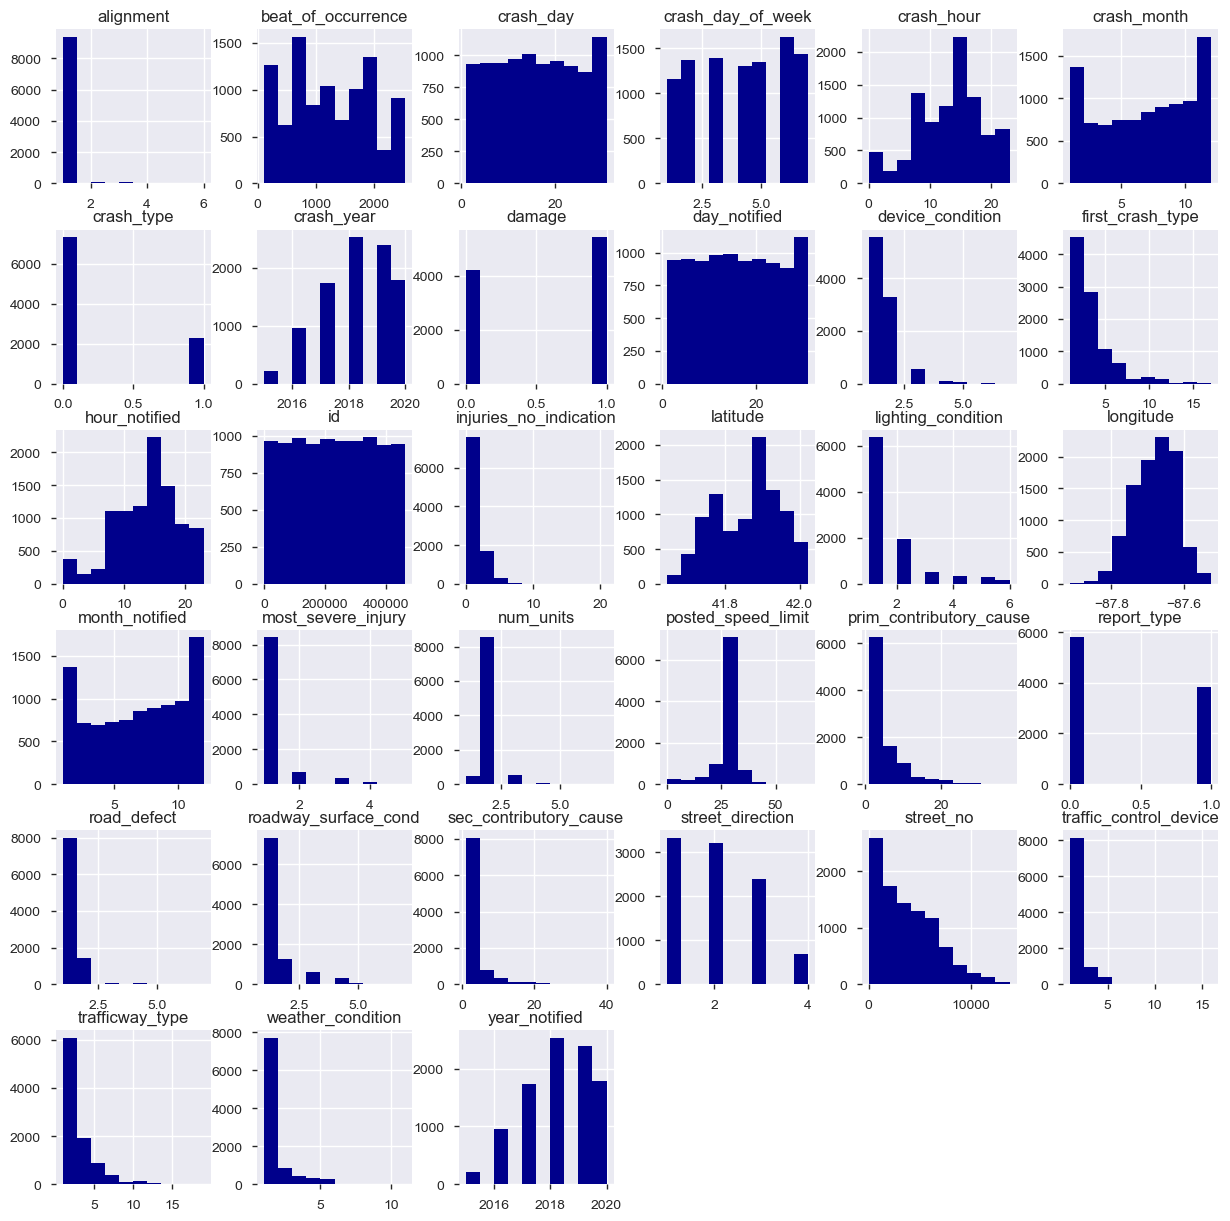

In [4]:
df.hist(color='DarkBlue',figsize= (15,15)); 

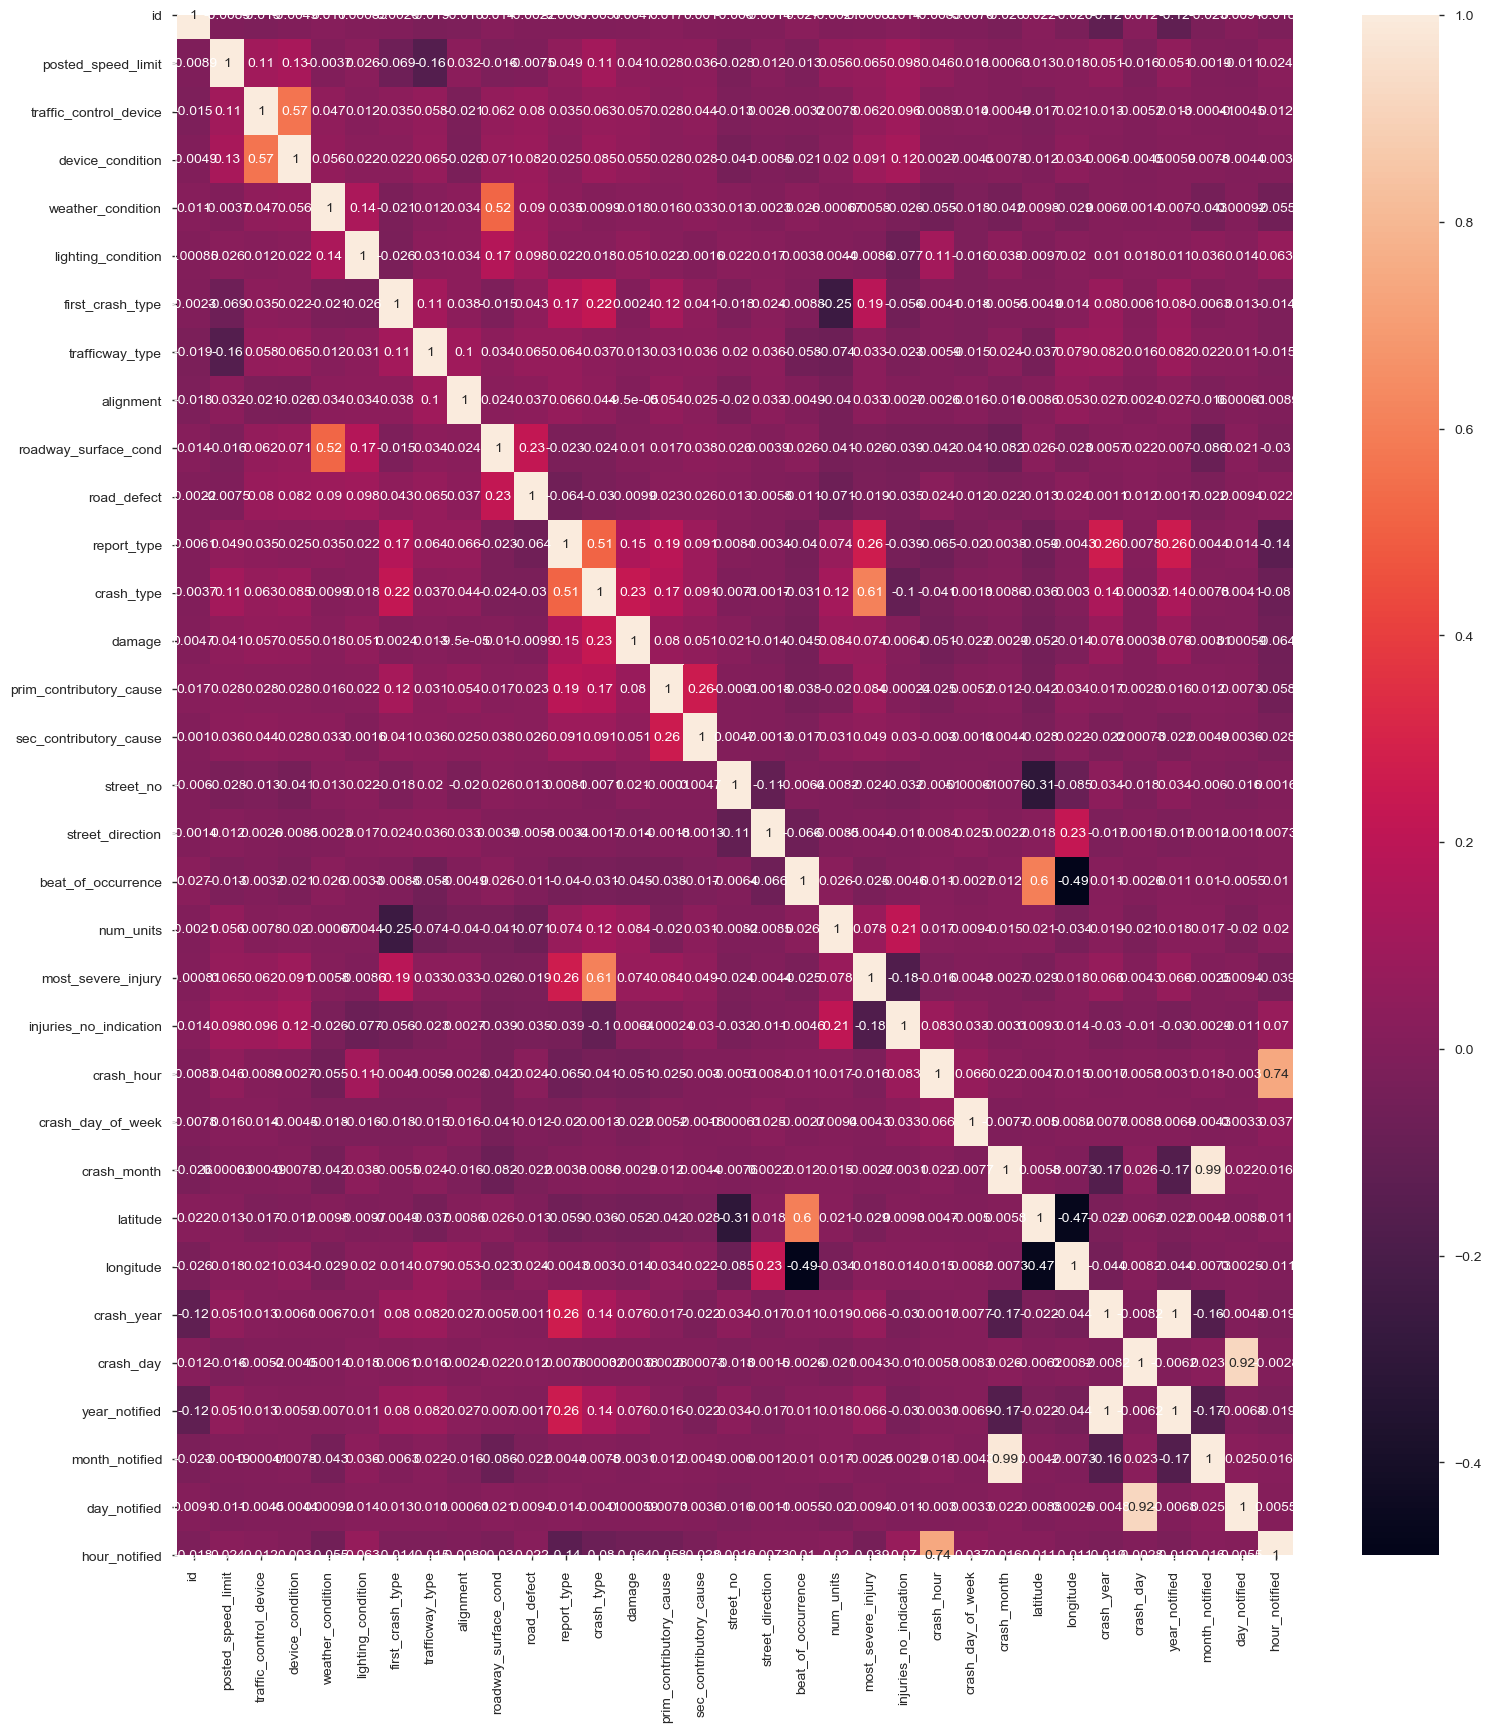

In [5]:
plt.figure(figsize=(18,20))
sns.heatmap(df.corr(),annot=True ) 

### Model prepration & Train Test Split

In [6]:
y = df["damage"]
X = df.drop('damage',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

#### Before applying algorithm checking whether the data is equally splitted or not,to avoid data imbalacing problem

In [7]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 3336, 1: 4361})

#### Scaling with Standard Scaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **ML models**

Different machine learning algorithm to be used and try to find algorithm which predict accurately.

1. Logistic Regression (Baseline)
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine


### Baseline model Logistic Regression

In [9]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[380 479]
 [301 765]]


Accuracy of Logistic Regression: 59.480519480519476 

              precision    recall  f1-score   support

           0       0.56      0.44      0.49       859
           1       0.61      0.72      0.66      1066

    accuracy                           0.59      1925
   macro avg       0.59      0.58      0.58      1925
weighted avg       0.59      0.59      0.59      1925



### Model 2 Naive Bayes

In [10]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[627 232]
 [588 478]]


Accuracy of Naive Bayes model: 57.4025974025974 

              precision    recall  f1-score   support

           0       0.52      0.73      0.60       859
           1       0.67      0.45      0.54      1066

    accuracy                           0.57      1925
   macro avg       0.59      0.59      0.57      1925
weighted avg       0.60      0.57      0.57      1925



### Model 3 Random Forest Classfier

In [11]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[246 613]
 [187 879]]


Accuracy of Random Forest: 58.44155844155844 

              precision    recall  f1-score   support

           0       0.57      0.29      0.38       859
           1       0.59      0.82      0.69      1066

    accuracy                           0.58      1925
   macro avg       0.58      0.56      0.53      1925
weighted avg       0.58      0.58      0.55      1925



### Model 4 Extreme Gradient Boost

In [12]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[360 499]
 [268 798]]


Accuracy of Extreme Gradient Boost: 60.15584415584415 

              precision    recall  f1-score   support

           0       0.57      0.42      0.48       859
           1       0.62      0.75      0.68      1066

    accuracy                           0.60      1925
   macro avg       0.59      0.58      0.58      1925
weighted avg       0.60      0.60      0.59      1925



### Model 5 K-NeighborsClassifier 

In [13]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[519 340]
 [488 578]]


Accuracy of K-NeighborsClassifier: 56.98701298701299 

              precision    recall  f1-score   support

           0       0.52      0.60      0.56       859
           1       0.63      0.54      0.58      1066

    accuracy                           0.57      1925
   macro avg       0.57      0.57      0.57      1925
weighted avg       0.58      0.57      0.57      1925



### Model 6 DecisionTreeClassifier 

In [14]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[575 284]
 [478 588]]


Accuracy of DecisionTreeClassifier: 60.41558441558441 

              precision    recall  f1-score   support

           0       0.55      0.67      0.60       859
           1       0.67      0.55      0.61      1066

    accuracy                           0.60      1925
   macro avg       0.61      0.61      0.60      1925
weighted avg       0.62      0.60      0.60      1925



### Model 7 Support Vector Classifier 

In [15]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[439 420]
 [327 739]]


Accuracy of Support Vector Classifier: 61.19480519480519 

              precision    recall  f1-score   support

           0       0.57      0.51      0.54       859
           1       0.64      0.69      0.66      1066

    accuracy                           0.61      1925
   macro avg       0.61      0.60      0.60      1925
weighted avg       0.61      0.61      0.61      1925



#### Receiver operating characteristic Curve

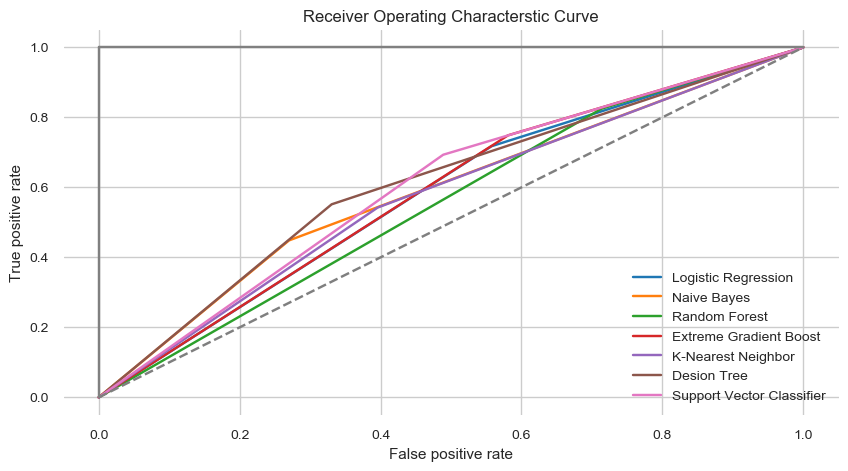

In [16]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [17]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,59.480519
1,Naive Bayes,57.402597
2,Random Forest,58.441558
3,Extreme Gradient Boost,60.155844
4,K-Nearest Neighbour,56.987013
5,Decision Tree,60.415584
6,Support Vector Machine,61.194805


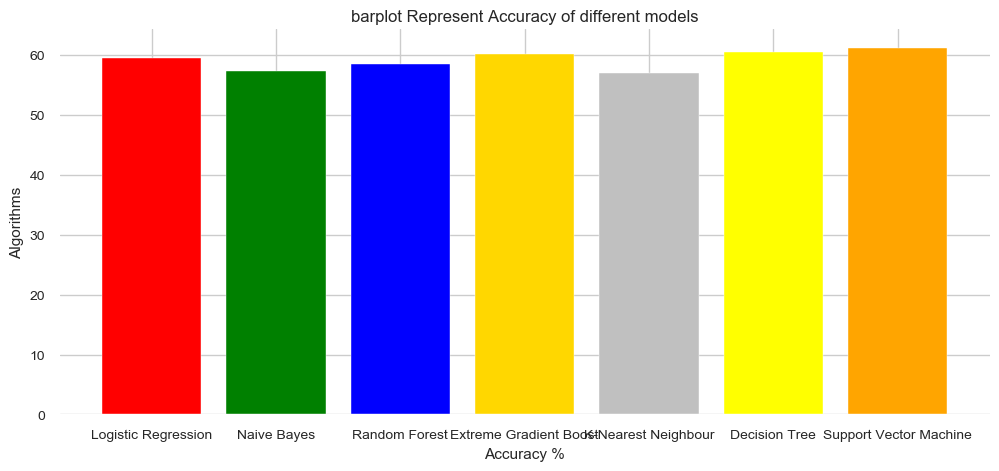

In [18]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

###  Stacking technique_Ensembling to improve accuracy

In [19]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[440 419]
 [327 739]]


Accuracy of StackingCVClassifier: 61.24675324675325 

              precision    recall  f1-score   support

           0       0.57      0.51      0.54       859
           1       0.64      0.69      0.66      1066

    accuracy                           0.61      1925
   macro avg       0.61      0.60      0.60      1925
weighted avg       0.61      0.61      0.61      1925



### Conclusion

1) Support Vector Machine gives the best Accuracy compared to other models.

2) Ensembling technique increased the accuracy of the model by a small margin.

